## GARCH Model From Scratch

Genarative Autoregresive Conditional Heteroscedastic (GARCH) Model, is a model

In [1]:
# Import Library
import numpy as np
import pandas as pd

import yfinance as yf

import matplotlib.pyplot as plt

from ml_from_scratch import GARCH

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load data from yfinance
def read_data(ticker,start,end):
    data = yf.download(f'{ticker}.jk',start,end)['Close']

    return data

def get_returns(data):
    returns = np.array(data)[1:]/np.array(data)[:-1] -1

    return returns

In [3]:
#Load data
data = read_data('BBNI','2023-01-01','2023-12-31')

returns = get_returns(data)
returns


[*********************100%%**********************]  1 of 1 completed


array([ 0.00542005, -0.01078167, -0.01907357, -0.01111111,  0.01123596,
       -0.03055556, -0.02578797,  0.01176471,  0.00872093,  0.01152738,
        0.01709402, -0.00560224,  0.0084507 ,  0.00837989,  0.00277008,
        0.00276243,  0.04407713,  0.00791557, -0.02617801, -0.01612903,
       -0.00273224, -0.00273973,  0.02197802,  0.00537634,  0.0026738 ,
        0.01066667,  0.00791557, -0.0026178 , -0.00262467, -0.00526316,
       -0.0026455 , -0.00795756, -0.00802139, -0.01347709, -0.01092896,
       -0.02209945,  0.01129944, -0.00558659,  0.00561798, -0.01955307,
        0.01994302, -0.00837989, -0.01408451,  0.00571429,  0.01136364,
       -0.00280899,  0.03098592, -0.0136612 , -0.00277008, -0.025     ,
        0.002849  ,  0.01704545,  0.00837989, -0.00277008,  0.025     ,
        0.04336043, -0.01298701, -0.05      ,  0.01939058,  0.01630435,
        0.        ,  0.        ,  0.        , -0.0026738 ,  0.00536193,
       -0.00533333,  0.00536193, -0.00266667,  0.0026738 ,  0.00

In [4]:
garch = GARCH(data=returns)
params = garch.fit()
predict = garch.predict()
forcast = garch.forcast()

In [5]:
predict

array([0.00017378, 0.00913746, 0.01159936, 0.0142135 , 0.01337971,
       0.01285185, 0.01799339, 0.01814803, 0.0148959 , 0.01311248,
       0.01279741, 0.01376136, 0.01247266, 0.01212694, 0.01199041,
       0.01150147, 0.01131851, 0.02192313, 0.01623382, 0.01764714,
       0.01568022, 0.01306849, 0.01198093, 0.01472158, 0.01273057,
       0.01178355, 0.01218164, 0.01195617, 0.01154484, 0.01139225,
       0.01153912, 0.0113913 , 0.01185713, 0.01203045, 0.01303217,
       0.01290456, 0.01542584, 0.01366805, 0.01243387, 0.01183027,
       0.01440873, 0.01498099, 0.01328036, 0.01358833, 0.0122898 ,
       0.01247098, 0.01175138, 0.01738814, 0.01510093, 0.0128204 ,
       0.01623981, 0.01326225, 0.01390943, 0.01267339, 0.01182754,
       0.01553622, 0.02258544, 0.01731684, 0.02595121, 0.0197374 ,
       0.0163268 , 0.01327222, 0.01197229, 0.01146406, 0.01136535,
       0.01141331, 0.01155356, 0.0114817 , 0.01137141, 0.01126774,
       0.01122964, 0.01136116, 0.01126307, 0.01198408, 0.01205

In [6]:
forcast

array([0.01303406, 0.00907037, 0.01047398, 0.01132405, 0.01235824,
       0.01201563, 0.01180465, 0.01403255, 0.01410464, 0.01264658,
       0.01190823])

In [7]:
returns

array([ 0.00542005, -0.01078167, -0.01907357, -0.01111111,  0.01123596,
       -0.03055556, -0.02578797,  0.01176471,  0.00872093,  0.01152738,
        0.01709402, -0.00560224,  0.0084507 ,  0.00837989,  0.00277008,
        0.00276243,  0.04407713,  0.00791557, -0.02617801, -0.01612903,
       -0.00273224, -0.00273973,  0.02197802,  0.00537634,  0.0026738 ,
        0.01066667,  0.00791557, -0.0026178 , -0.00262467, -0.00526316,
       -0.0026455 , -0.00795756, -0.00802139, -0.01347709, -0.01092896,
       -0.02209945,  0.01129944, -0.00558659,  0.00561798, -0.01955307,
        0.01994302, -0.00837989, -0.01408451,  0.00571429,  0.01136364,
       -0.00280899,  0.03098592, -0.0136612 , -0.00277008, -0.025     ,
        0.002849  ,  0.01704545,  0.00837989, -0.00277008,  0.025     ,
        0.04336043, -0.01298701, -0.05      ,  0.01939058,  0.01630435,
        0.        ,  0.        ,  0.        , -0.0026738 ,  0.00536193,
       -0.00533333,  0.00536193, -0.00266667,  0.0026738 ,  0.00

In [8]:
res_retun = returns - np.mean(returns)

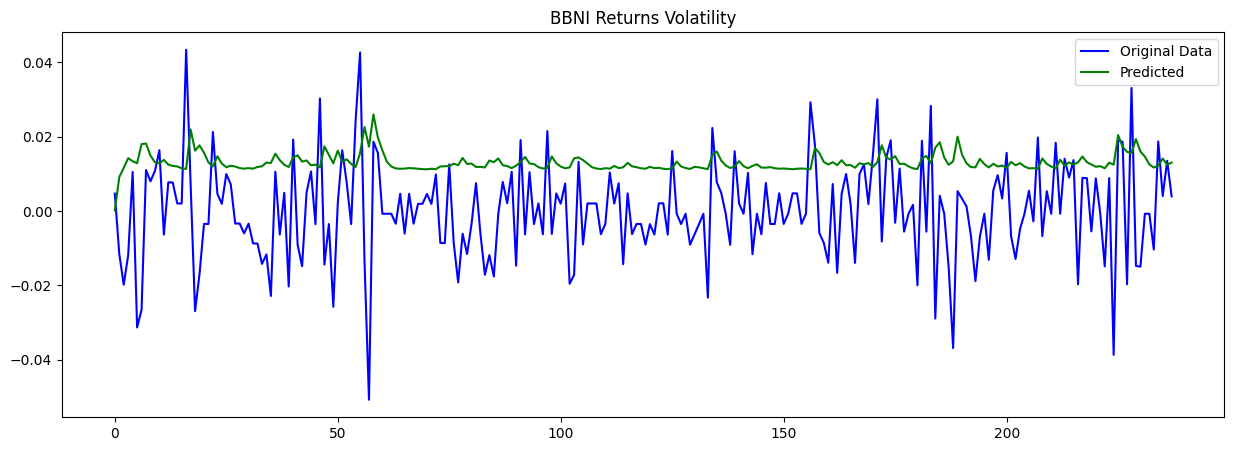

In [9]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(15,5))

ax.plot(res_retun, color='blue', label='Original Data')
ax.plot(predict, color='green', label='Predicted')


plt.title("BBNI Returns Volatility")
plt.legend()
plt.show()

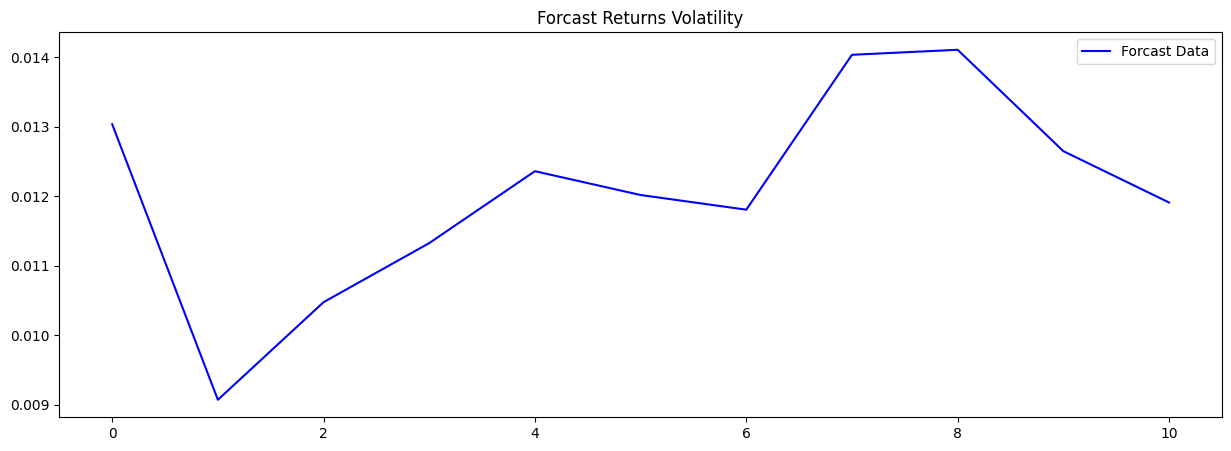

In [10]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(15,5))

ax.plot(forcast, color='blue', label='Forcast Data')

plt.title("Forcast Returns Volatility")
plt.legend()
plt.show()